In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


In [36]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\knn\\glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [37]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [39]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [40]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [41]:
data1=data.drop(data.index[39],axis=0)

In [42]:
data1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [64]:
data1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:xlabel='Fe', ylabel='Density'>

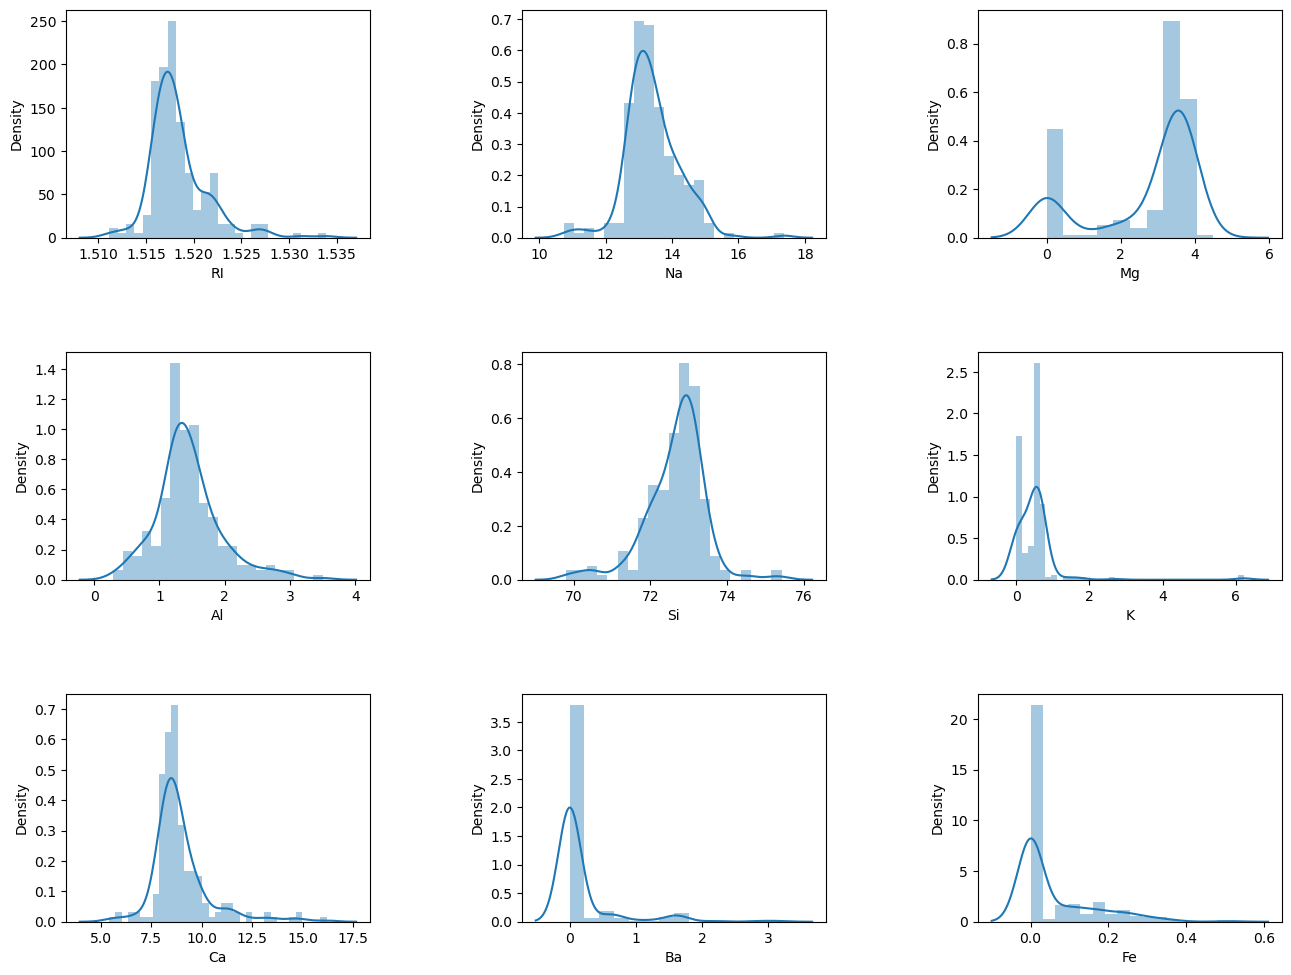

In [48]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,3,1)
sns.distplot(data['RI'])
plt.subplot(3,3,2)
sns.distplot(data['Na'])
plt.subplot(3,3,3)
sns.distplot(data['Mg'])
plt.subplot(3,3,4)
sns.distplot(data['Al'])
plt.subplot(3,3,5)
sns.distplot(data['Si'])
plt.subplot(3,3,6)
sns.distplot(data['K'])
plt.subplot(3,3,7)
sns.distplot(data['Ca'])
plt.subplot(3,3,8)
sns.distplot(data['Ba'])
plt.subplot(3,3,9)
sns.distplot(data['Fe'])


<AxesSubplot:xlabel='Fe'>

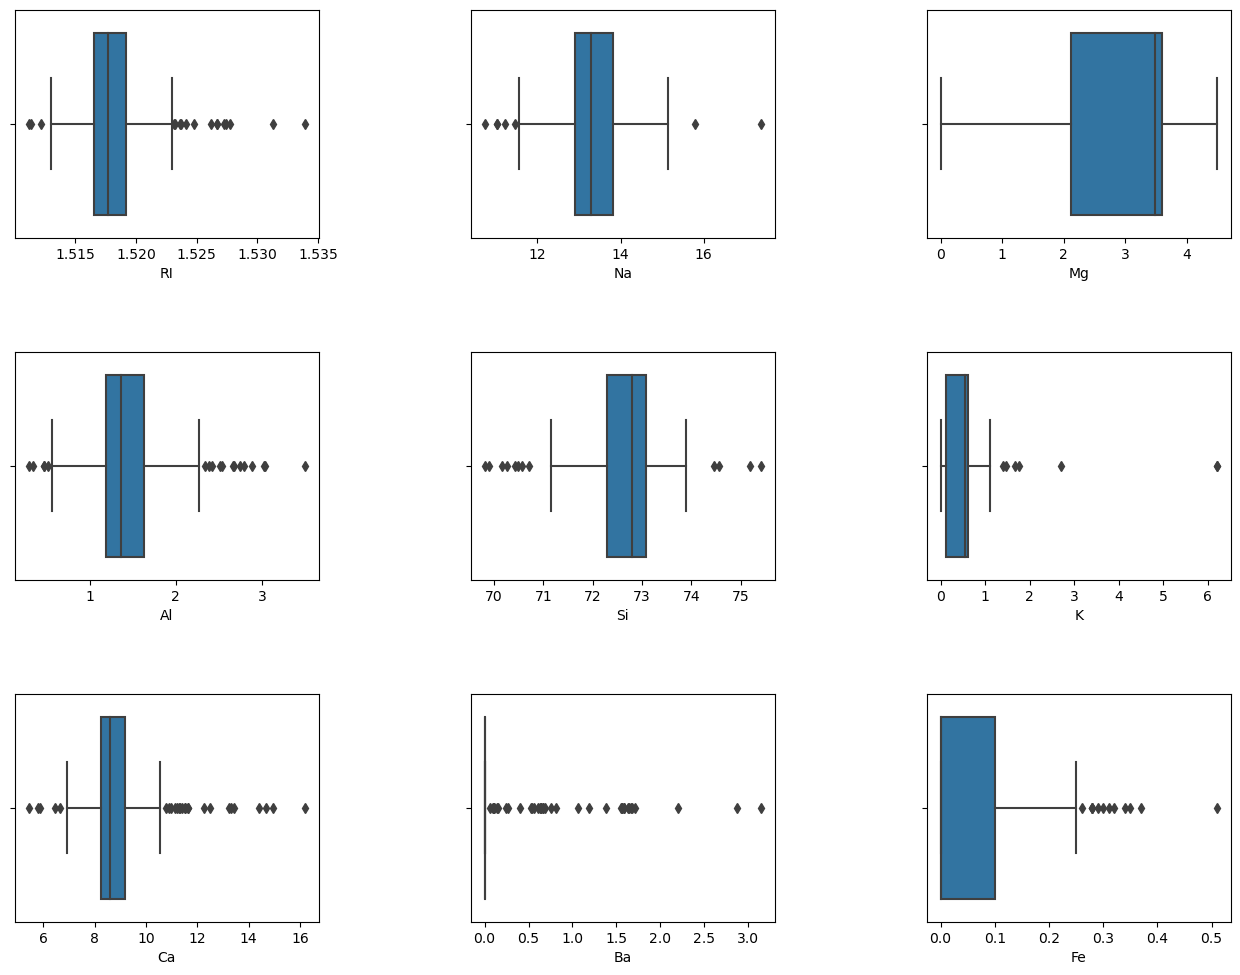

In [60]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,3,1)
sns.boxplot(data['RI'])
plt.subplot(3,3,2)
sns.boxplot(data['Na'])
plt.subplot(3,3,3)
sns.boxplot(data['Mg'])
plt.subplot(3,3,4)
sns.boxplot(data['Al'])
plt.subplot(3,3,5)
sns.boxplot(data['Si'])
plt.subplot(3,3,6)
sns.boxplot(data['K'])
plt.subplot(3,3,7)
sns.boxplot(data['Ca'])
plt.subplot(3,3,8)
sns.boxplot(data['Ba'])
plt.subplot(3,3,9)
sns.boxplot(data['Fe'])

### There are lot of outliers,all the features except Mg so we cant remove all the outliers it might telling something interesting about data

# Correlation Analysis

In [62]:
corr=data1.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<AxesSubplot:>

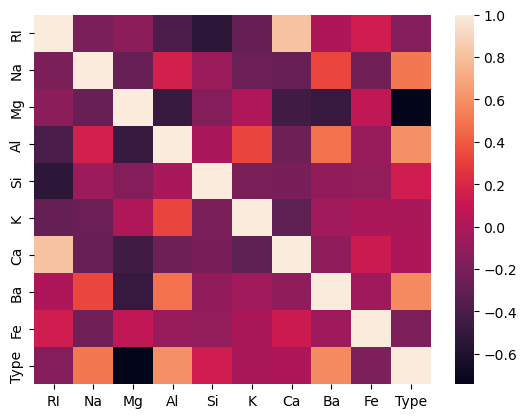

In [63]:
sns.heatmap(corr)

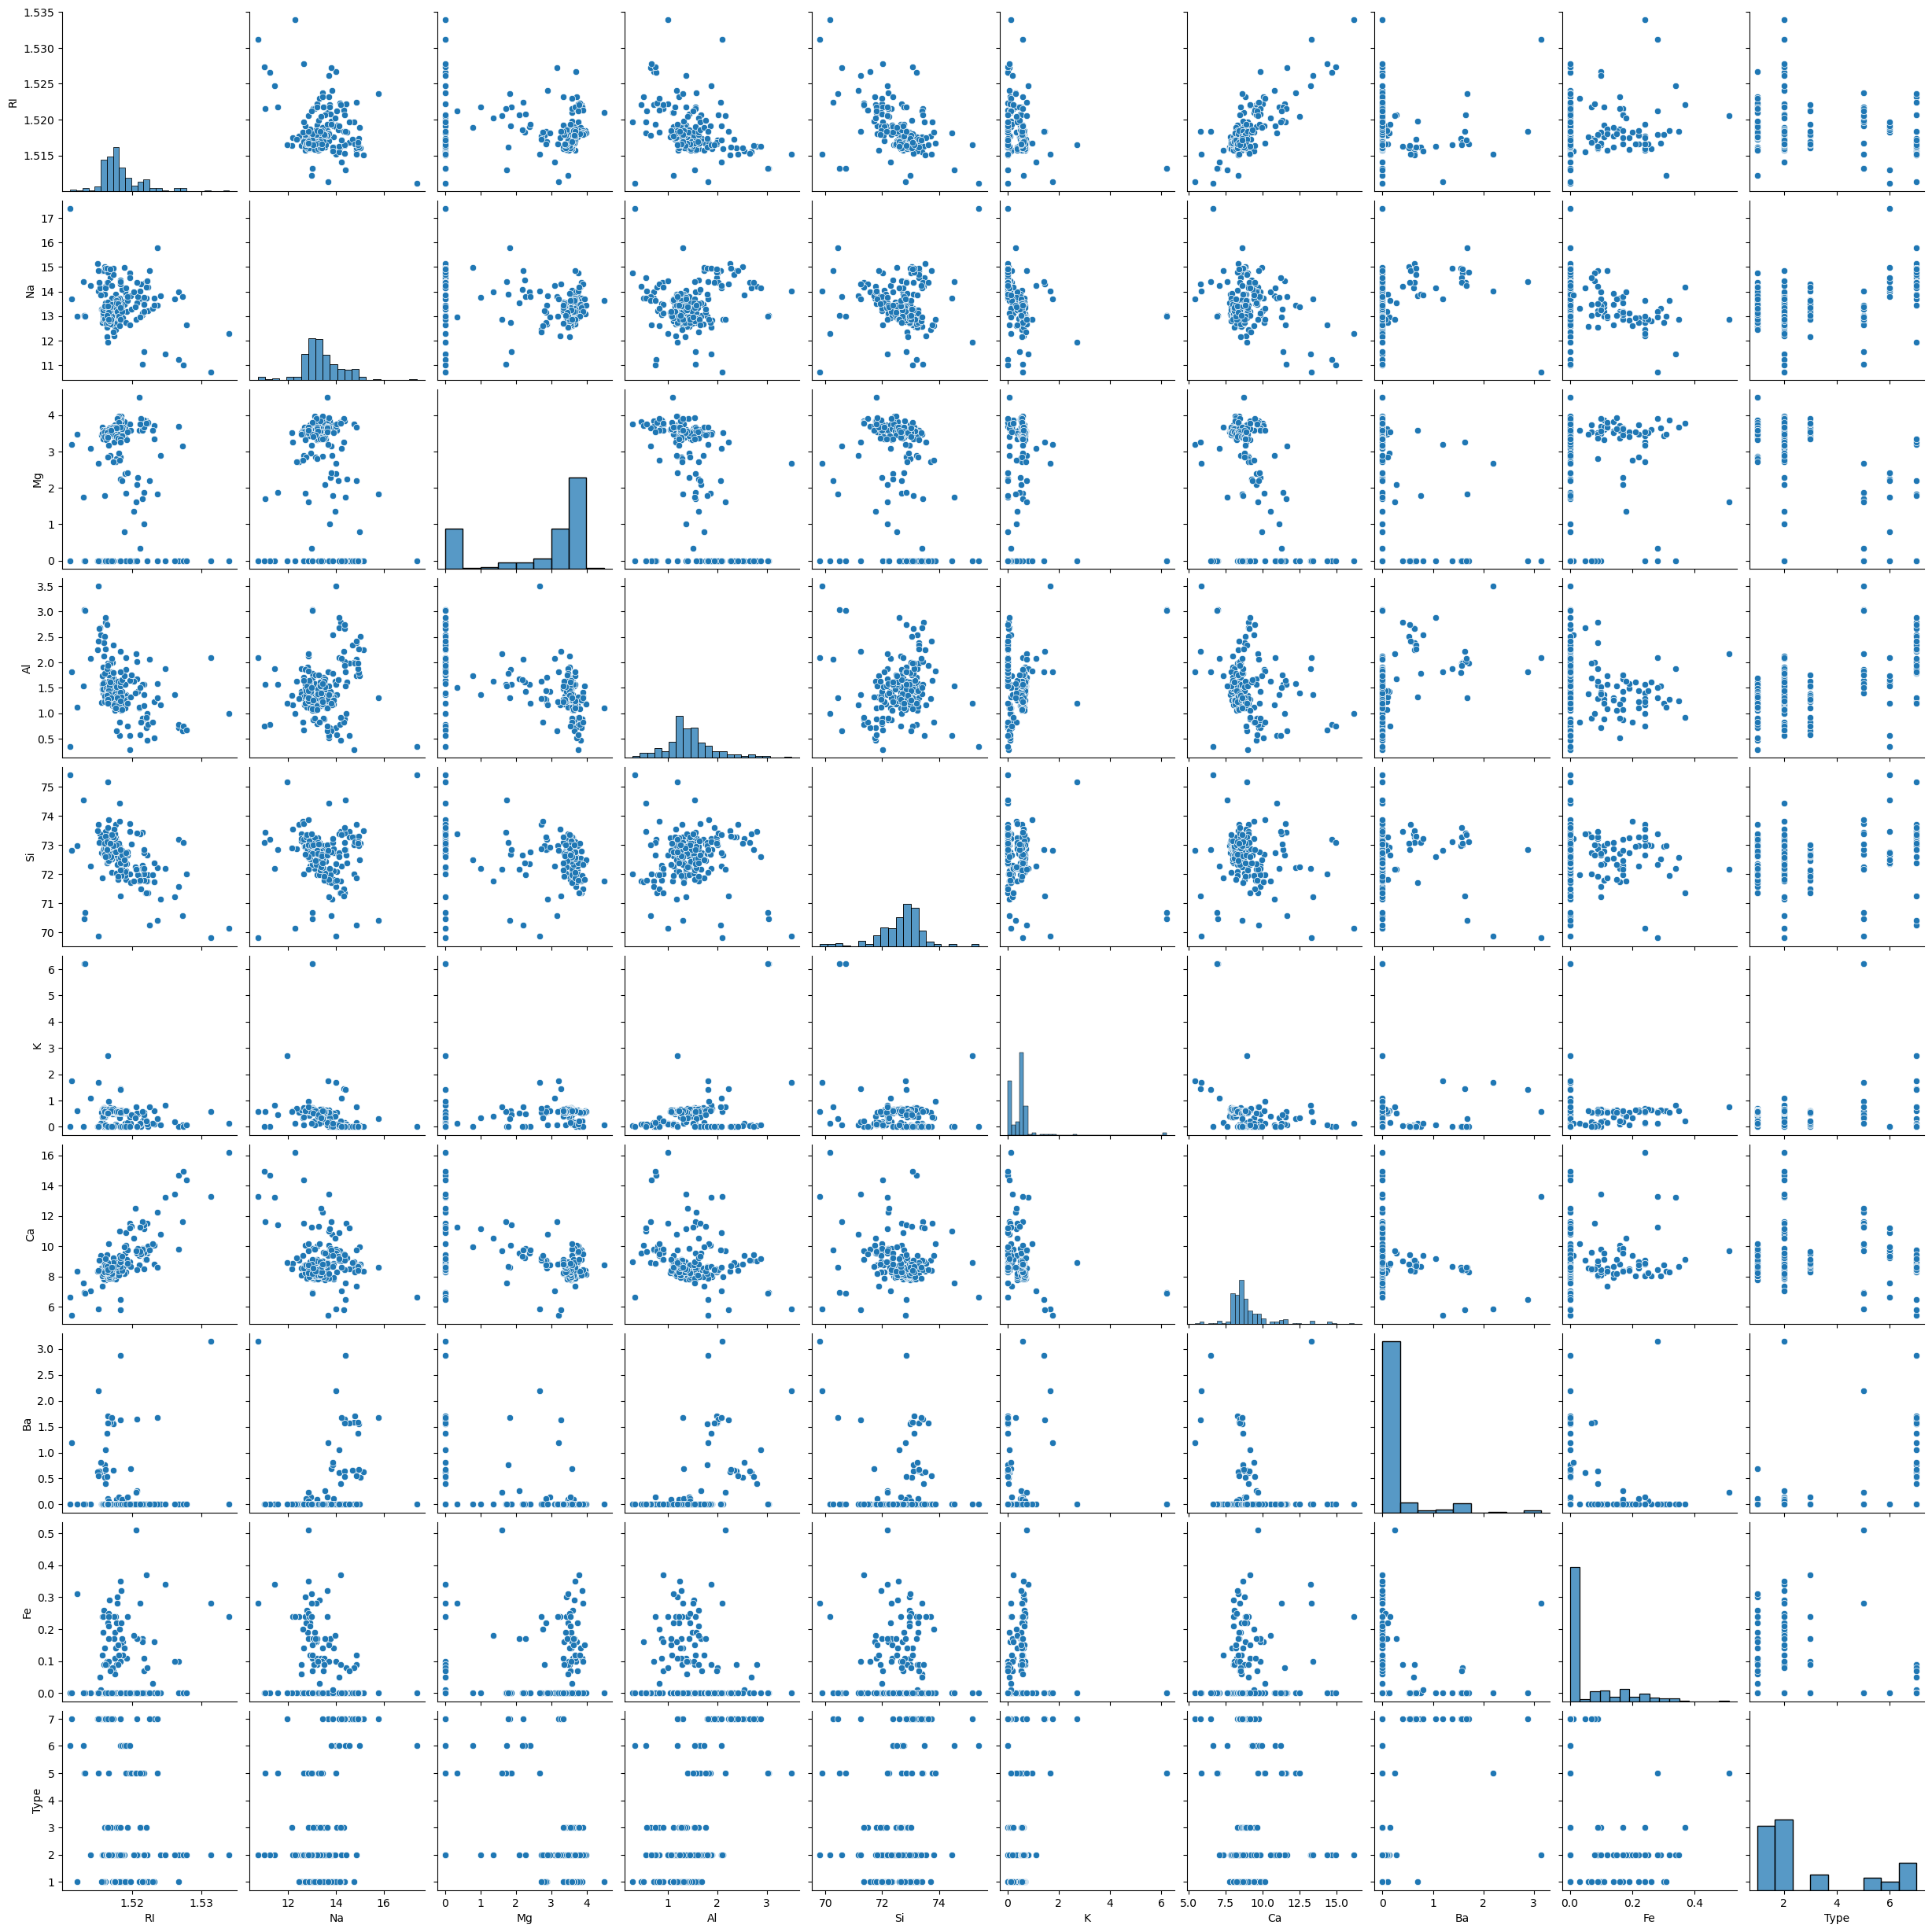

In [171]:
sns.pairplot(data1)

## Noticeable negative correlations can be observed with:

### Ca/RI → 0.810403(strongly correlated)
### Ba/Al → 0.479404
### Ba/Na → 0.326603
### K/Al → 0.325958

## Noticeable negative correlations can be observed with:

### Si/RI = -0.542052
### Ba/Mg = -0.492262
### Al/Mg = -0.481798
### Ca/Mg = -0.443750

In [ ]:
#We can notice that Ca and K values don't affect Type that much.

#Also Ca and RI are highly correlated,multicollinearity exist, this means using only RI is enough.

#but we can performe feature selection come to conclusion

In [168]:
x=data1.drop(columns=['Type'])
y=data1['Type']

In [169]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]           

In [170]:
vif

,variables,VIF
0,RI,723057.269837
1,Na,13870.541985
2,Mg,792.079451
3,Al,175.032133
4,Si,365399.601887
5,K,56.994832
6,Ca,8010.515875
7,Ba,27.452052
8,Fe,1.598053


# multicollinearity exist

In [68]:
#scaler=StandardScaler()
#x=scaler.fit_transform(x)

In [70]:
#x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

# feature selection-univariate feature selection

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.feature_selection import RFE

In [116]:
# feature extraction 
test = SelectKBest(score_func=chi2,k=5)
fit = test.fit(x, y)
# summarize scores
set_printoptions(precision=4)
print(fit.scores_)
features = fit.transform(x)

[4.6575e-05 4.3351e+00 1.0073e+02 1.6602e+01 1.0978e-01 3.1485e+01
 3.2374e+00 1.4466e+02 2.1606e+00]


In [104]:
fit1 = test.fit_transform(x, y)
print('reduced feature no',fit1.shape[1])
print('original feature no',x.shape[1])

reduced feature no 5
original feature no 9


In [105]:
df_score = pd.DataFrame(fit.pvalues_,columns=['P_values'])
df_score['scores'] = fit.scores_

In [106]:
df_score

,P_values,scores
0,1.000000e+00,0.000047
1,5.022430e-01,4.335113
2,3.710594e-20,100.728772
3,5.319764e-03,16.602047
4,9.997958e-01,0.109779
5,7.512150e-06,31.485097
6,6.634320e-01,3.237442
7,1.827252e-29,144.659991
8,8.265090e-01,2.160581


In [117]:
fit.get_support()

array([False,  True,  True,  True, False,  True, False,  True, False])

In [90]:
# by feature selection we can see that chi sqaure score and p value of feature RI having low score and p value >0.05
#RI,SI,ca,fe,Na having less score and p values is >0.05,so these these features are not significant to target variable

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype=object)

In [ ]:
#Na,Mg,al,k,ba are the 5 best for model buiding based on the filter methods

# Feature scaling-standardization

In [119]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
# train test split

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [144]:
x_train

array([[ 0.7377, -0.6801, -0.7423, ...,  0.5244,  0.129 ,  4.65  ],
       [-0.5313, -0.7537,  0.5838, ..., -0.741 , -0.3538, -0.5883],
       [ 1.0484, -0.4346,  0.674 , ...,  0.6298, -0.3538,  1.1578],
       ...,
       [-0.8089, -0.2014,  0.4588, ..., -0.516 , -0.3538, -0.5883],
       [-1.7707,  1.2224, -0.6521, ..., -0.9589, -0.3538, -0.5883],
       [ 2.9421,  0.4859,  0.3269, ...,  1.8881, -0.3538, -0.5883]])

# model building using knn

In [124]:
kfold=KFold(n_splits=10)
model=KNeighborsClassifier()
results=cross_val_score(model,x,y,cv=kfold)
results.mean()

0.5512987012987014

In [125]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [127]:
y_pred=model.predict(x_test)

In [128]:
model.score(x_train,y_train)

0.7248322147651006

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.65      0.94      0.77        18
           2       0.71      0.71      0.71        24
           3       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         4
           6       1.00      0.33      0.50         3
           7       1.00      0.73      0.84        11

    accuracy                           0.70        64
   macro avg       0.64      0.54      0.55        64
weighted avg       0.70      0.70      0.68        64



# gridsearch cv

In [135]:
# gridsearch cv
from sklearn.model_selection import GridSearchCV

In [141]:
import numpy as np
n_neighbors = np.array(range(1,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [142]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)

In [148]:
grid_search.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [149]:
grid_search.best_params_

{'n_neighbors': 2}

# building new model using knn

In [151]:
model1=KNeighborsClassifier(n_neighbors=2,metric='euclidean')
model1.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [152]:
model.score(x_train,y_train)

0.7248322147651006

In [154]:
y_pred1=model1.predict(x_test)

In [155]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.59      0.89      0.71        18
           2       0.62      0.62      0.62        24
           3       0.00      0.00      0.00         4
           5       0.67      0.50      0.57         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.67        64
   macro avg       0.65      0.57      0.59        64
weighted avg       0.66      0.67      0.65        64



In [159]:
results1=cross_val_score(model1,x,y,cv=kfold)
results1.mean()

0.5833333333333334

# visualizing CV results

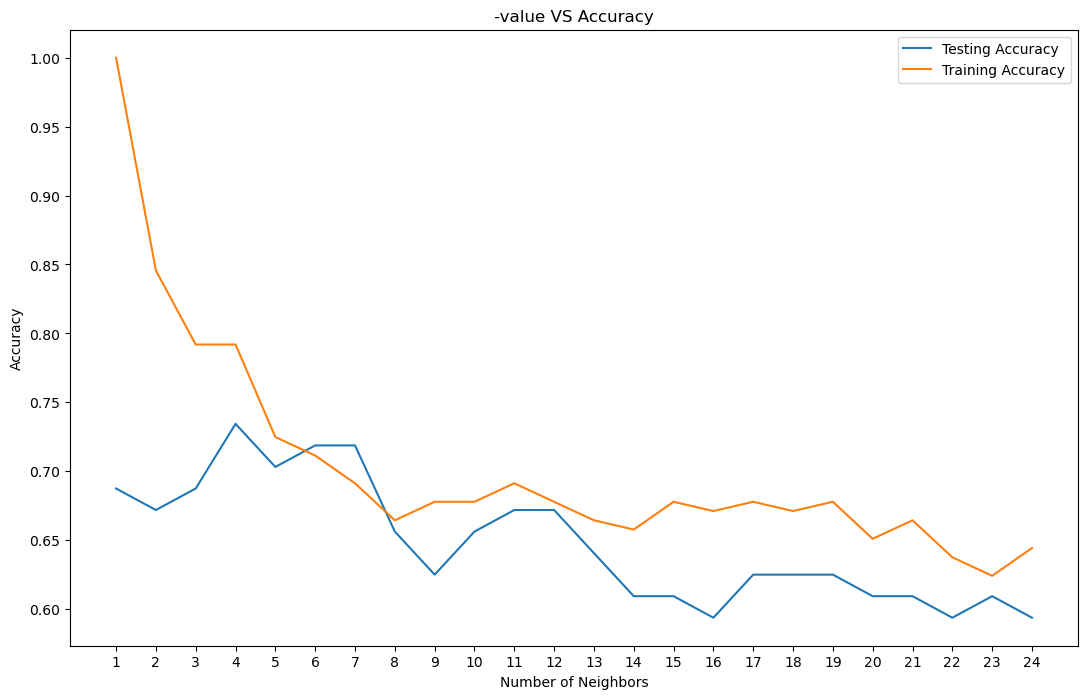

Best accuracy is 0.734375 with K = 4


In [161]:
k_values=np.arange(1,25)
train_acc=[]
test_acc=[]
for i,k in enumerate(k_values):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))
plt.figure(figsize=[13,8])
plt.plot(k_values, test_acc, label = 'Testing Accuracy')
plt.plot(k_values, train_acc, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_acc),1+test_acc.index(np.max(test_acc))))